**Spam Mail Prediction**

* Import Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

* Preprocessing the Data

In [32]:
# load the mail_data to pandas Data Frame
mail_data_url = "https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv"
mail__data = pd.read_csv(mail_data_url, sep='\t')
# replace the null values with a null string
mail_data = mail__data.where((pd.notnull(mail__data)), '')

In [60]:
mail_data.head()

,Type,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


Data Visualization

* Pictorial Representation

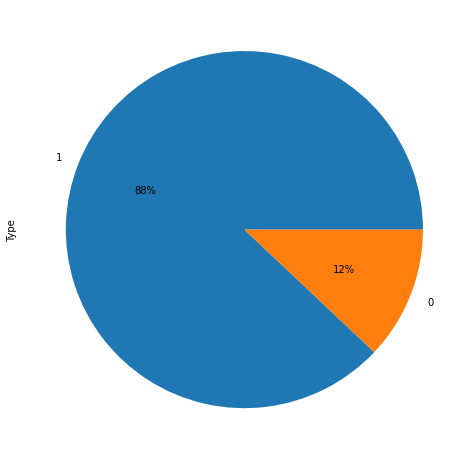

In [75]:
plt.rcParams["figure.figsize"] = [8,10] 
mail_data.Type.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [67]:
# label spam mail as 0; Non-spam mail (ham) mail as 1.
mail_data.loc[mail_data['Type'] == 'spam', 'Type',] = 0
mail_data.loc[mail_data['Type'] == 'ham', 'Type',] = 1

In [68]:
# separate the data as text and label. X --> text; Y --> label
X = mail_data['Message']
Y = mail_data['Type']

In [39]:
print(X)
print('.............')
print(Y)

0      Go until jurong point, crazy.. Available only ...
1                          Ok lar... Joking wif u oni...
2      Free entry in 2 a wkly comp to win FA Cup fina...
3      U dun say so early hor... U c already then say...
4      Nah I don't think he goes to usf, he lives aro...
                             ...                        
651                    Anything lor. Juz both of us lor.
652    Get me out of this dump heap. My mom decided t...
653    Ok lor... Sony ericsson salesman... I ask shuh...
654                                  Ard 6 like dat lor.
655    Why don't you wait 'til at least wednesday to ...
Name: Message, Length: 656, dtype: object
.............
0      1
1      1
2      0
3      1
4      1
      ..
651    1
652    1
653    1
654    1
655    1
Name: Type, Length: 656, dtype: object


* Train and Test Data

In [69]:
# split the data as train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=3)

* Feature Extraction

In [47]:
# transform the text data to feature vectors that can be used as input to the SVM model using TfidfVectorizer
# convert the text to lower case letters
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase='True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

* Training the model --> **Support Vector Machine**

In [43]:
# training the support vector machine model with training data
model = LinearSVC()
model.fit(X_train_features, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

* Evaluation of the model

In [48]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# prediction on testing data
prediction_on_testing_data = model.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)

print('Accuracy on training data : ', accuracy_on_training_data)
print('Accuracy on testing data : ', accuracy_on_testing_data)

Accuracy on training data :  1.0
Accuracy on testing data :  0.9393939393939394


* Prediction on new mail

In [74]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]
# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_mail_features)
print(prediction)

if (prediction[0]==1):
  print('Cool!!.....It is a Ham Mail\n\t\t\tBy:- Jeevan R')
else:
  print('Aleart!... It is a Spam Mail\n\t\t\tBy:- Jeevan R')

[1]
Cool!!.....It is a Ham Mail
			By:- Jeevan R
